<a href="https://colab.research.google.com/github/shashvatshah9/DLCodeDemo/blob/main/DL_Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision

In [ ]:
# Common torchvision code

In [ ]:
a = np.random.rand(2,3)
b = torch.from_numpy(a)

print(a)
print(b)

[[0.99440064 0.7295853  0.07292851]
 [0.96620492 0.33003035 0.10814416]]
tensor([[0.9944, 0.7296, 0.0729],
        [0.9662, 0.3300, 0.1081]], dtype=torch.float64)


In [ ]:
print(b+1)
print(torch.sin(b))

tensor([[1.9944, 1.7296, 1.0729],
        [1.9662, 1.3300, 1.1081]], dtype=torch.float64)
tensor([[0.8384, 0.6666, 0.0729],
        [0.8227, 0.3241, 0.1079]], dtype=torch.float64)


In [ ]:
A = torch.rand(2,2)
b = torch.rand(2,1)
x = torch.rand(2,1, requires_grad=True)
y = torch.matmul(A, x) + b
print(x)
print(y)

tensor([[0.6767],
        [0.2427]], requires_grad=True)
tensor([[1.3935],
        [0.8049]], grad_fn=<AddBackward0>)


In [ ]:
z = y.sum()
print(z)

tensor(2.1984, grad_fn=<SumBackward0>)


In [ ]:
z.backward()

In [ ]:
print(x)
print(x.grad)

tensor([[0.6767],
        [0.2427]], requires_grad=True)
tensor([[1.0837],
        [1.8186]])


In [12]:
trainindata = torchvision.datasets.FashionMNIST('./FashionMNIST', train = True, download = True, transform = torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST', train = False, download = True, transform = torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [14]:
print(len(trainindata))
print(len(testdata))


60000
10000


In [16]:
image, label = trainindata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


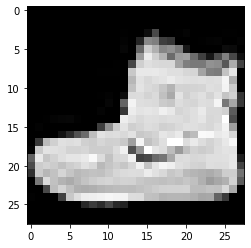

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [18]:
trainDataLoader = torch.utils.data.DataLoader(trainindata, batch_size = 64, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(trainindata, batch_size = 64, shuffle=False)


In [20]:
images, labels = next(iter(trainDataLoader))
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


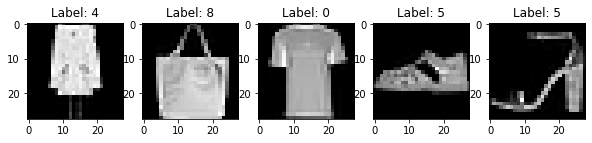

In [22]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.title("Label: " + str(labels[i].item()))
    plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)

In [ ]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel).__init__()
        self.linear = torch.nn.Linear(in_features=28*28, out_features=10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.linear(x)